In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


**First we check if we are navigating to the right directory for file using listdir**

In [2]:
os.listdir('../input/telco-customer-churn')

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

**we now import the required libraries**

In [3]:
import numpy as np
import pandas as pd
import pandas_profiling as pdf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline
#loading the CSV
filepath = "../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(filepath)

**we now check a portion of data to get an idea about it **

In [4]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

**we now check the shape i.e rows and columns**

In [5]:
data.shape

(7043, 21)

** now we create a pie chart to 

No     5174
Yes    1869
Name: Churn, dtype: int64


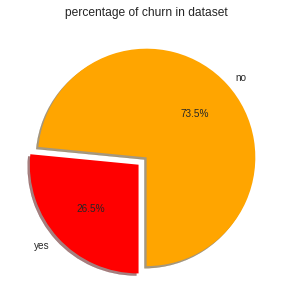

In [6]:
#plotting the data
sizes = data['Churn'].value_counts(sort=True)
print(sizes)
colors = ['orange', 'red']
#how much and which portion to "explode out of chart
explode=[0.0, 0.1]
rcParams['figure.figsize'] = 5,5
labels =['no', 'yes']

#plot 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('percentage of churn in dataset')
plt.show()

**we dont need customer ID to make prediction so we drop it**

In [7]:
data.drop(['customerID'], axis=1, inplace=True)

**we now check the sum od null values in all columns**

In [8]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**we now check the datatypes of all columns**

In [9]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
pdf.ProfileReport(data)

**we now check mean, min and max values to check any outliers**

In [11]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

**we see that "TotalCharges" is in object format. and our ML model can only work with numeric data. we will use "to_numeric" fuction for that**

In [12]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype('float32')

In [13]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**we again check the values and type of TotalCharges columns**


In [14]:
data['TotalCharges']

0         29.850000
1       1889.500000
2        108.150002
3       1840.750000
4        151.649994
           ...     
7038    1990.500000
7039    7362.899902
7040     346.450012
7041     306.600006
7042    6844.500000
Name: TotalCharges, Length: 7043, dtype: float32

**as we want only numeric values in columns so we replace 'yes' and 'No' in churn column with 1 and 0 respectively**

In [15]:
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No', value=0, inplace=True)

**similarly we replace yes and no with 1 and 0 in other columns too**

In [16]:
data.gender = [1 if each == 'Male' else 0 for each in data.gender]
columns_to_convert = ['Partner',
                      'Dependents',
                      'PhoneService',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling']
for item in columns_to_convert:
    data[item] = [1 if each == 'Yes' else 0 for each in data[item]]
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0  No phone service             DSL               0             1   
1                No             DSL               1             0   
2                No             DSL               1             1   
3  No phone service             DSL               1             0   
4                No     Fiber optic               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   

         Contract  PaperlessBilling              PaymentMethod  \
0  Month-to-month                 1           Electronic check   
1        One year                 0               Mailed check   
2  Month-to-month                 1               Mailed check   
3        One year                 0  Bank transfer (automatic)   
4  Month-to-month                 1           Electronic check   

   MonthlyCharges  TotalCharges  Churn  
0           29.85     29.850000      0  
1           56.95   1889.500000      0  
2           53.85    108.150002      1  
3           42.30   1840.750000      0  
4           70.70    151.649994      1

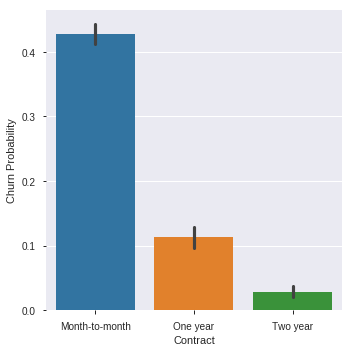

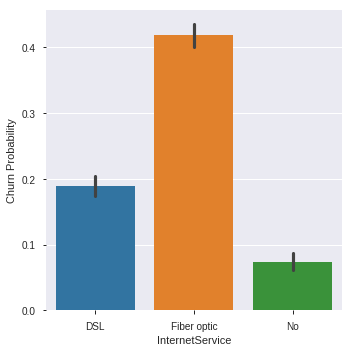

In [17]:
import seaborn as sns
g1 = sns.catplot(x='Contract', y='Churn', data=data, kind='bar')
g1.set_ylabels('Churn Probability')

g2= sns.catplot(x='InternetService', y='Churn', data=data, kind='bar')
g2.set_ylabels('Churn Probability')

**People having lower tenure and higher monthly charges are tend to churn more. Also as you can see below; having month-to-month contract and fiber obtic internet have a really huge effect on churn probability.**

**in columns where there are other string values apart from yes and no we could use get_dummies() convert them to 1 and 0.**

In [18]:
data = pd.get_dummies(data)
data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float32
Churn                                        int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL            

In [19]:
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  ...  \
0               0             1                 0            0  ...   
1               1             0                 1            0  ...   
2               1             1                 0            0  ...   
3               1             0                 1            1  ...   
4               0             0                 0            0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 29 columns]

In [20]:
data.corr()['Churn'].sort_values()

tenure                                    -0.352229
Contract_Two year                         -0.302253
InternetService_No                        -0.227890
TotalCharges                              -0.198324
Contract_One year                         -0.177820
OnlineSecurity                            -0.171226
TechSupport                               -0.164674
Dependents                                -0.164221
Partner                                   -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
OnlineBackup                              -0.082255
DeviceProtection                          -0.066160
MultipleLines_No                          -0.032569
MultipleLines_No phone service            -0.011942
gender                                    -0.008612
PhoneService                               0.011942
MultipleLine

**Customers having month-to-month contract, having fiber optic internet service and using electronic payment are tend to churn more whereas people having two-year contract and having internet service are tend to not churn.**

**now we seperate data into X and Y where X is independent variables and Y is dependent or our prediction values**

In [21]:
Y = data['Churn'].values
X = data.drop(labels =['Churn'], axis=1)

#create train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


**now we import logistic regression model as it used for yes for binary prediction, in our case yes or no and fit the model the data to model using fit()**


In [22]:
#importing logistic regerssion model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

**now we check the accuracy of the model**

In [23]:
from sklearn import metrics
prediction = model.predict(X_test)
#print the prdiction accuracy
print(metrics.accuracy_score(y_test, prediction))

0.8034066713981547


**we see that the accuracy comes out to be pretty decent at around 80% which means we were able to predict 80% of the cases correctly but accuaracy is not the best predictor of model accuracy**

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
results = confusion_matrix(y_test, prediction)
print('Confusion Matrix: ')
print(results)
print(classification_report(y_test, prediction))

Confusion Matrix: 
[[940  86]
 [191 192]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1026
           1       0.69      0.50      0.58       383

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



**Here we seee that the model gave recall of 0.92 which means high no of corrctly recognized class i.e correct predict of chrun cases.**

**Recall:**

**Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized (small number of FN).**

**Precision:**
**To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive (small number of FP).**

**High recall, low precision:This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.**

**Low recall, high precision:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)**

**The F-Measure will always be nearer to the smaller value of Precision or Recall.**